  #   Exploratory Data Analysis ON A Movies Dataset

## Introduction

In this analysis we'll make use of pandas, data cleaning and exploratory data analysis. In order to answer our analysis questions we'll haave to import, clean, combine, reshape, and visualize our data. 

### 1. Load The Data

In the cell below we'll import the necessary libaries with their respective standard aliases.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, we use pandas to load the files we'll use in our analysis.

In [2]:
budget_df = pd.read_csv('tn.movie_budgets.csv')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,"$7,000",$0,$0
5778,79,2-Apr-99,Following,"$6,000","$48,482","$240,495"
5779,80,13-Jul-05,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,29-Sep-15,A Plague So Pleasant,"$1,400",$0,$0


Now we can familirialize ourselves with our data by getting to know it's dimensions, the number of columns it contains, if there are null values in the data and the data types

In [3]:
## get a summary of the data frame
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the results provided above we can tell that our data contains 6 columns with 5782 rows. There are no null values in the columns and almost every columns' data type is object apart from the id coluumn which is an integer

#### 2. What Is the Relationship between Budget and Revenue?
In this question we want to find what is the relationship between Revenue and the Budget. It can either be positive or Negative.
In order to do this we first need to find the revenue by first finding the sum of the gross earnings.
Based off the summarry its evident that the production budget, domestic and worldwide gross are in the object data type and need to be converted into the integer data type.

In [4]:
# convert the production,domestic,worldwide columns into the integer datatype
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].replace('[\$,]', '', regex=True)

In the cell above, i filtered out the 3rd to the last columns through slicing. The first step in our conversion is to remove the dollar sign.

In [5]:
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].replace('[,]','',regex=True)

In the cell above, i then removed the comma that was in between the digits as you cannot convert numbers with commas to integers as it will bring about an error.

In [6]:
# assign the integer data type to the columns
budget_df[budget_df.columns[3:]] = budget_df[budget_df.columns[3:]].astype(np.int64)

In [7]:
# get summary of the dataframe
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


AS you can see from the above cell, i have successfully converted the data type of the last three columns to integer. From the summary its evident that none of the columns have null values, so we need to check if there are any placeholders in the columns.

In [8]:
budget_df['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

In [9]:
budget_df['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

In [10]:
budget_df['production_budget'].value_counts()

20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
           ... 
16400000      1
103000        1
6537890       1
780000        1
28500000      1
Name: production_budget, Length: 509, dtype: int64

In [11]:
# Create the revenue column
budget_df['revenue'] = budget_df['domestic_gross'] + budget_df['worldwide_gross']

In [12]:
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0


From the above code, we have successfully added the revenue column to our dataframe.

##### Answering the Question

In order to answer the question we need to plot a scatter plot to show the correlation between the two but first i'll get the correlation coefficient to give me a rough idea on what the correlation between the two might be,that is, it can be positive,negative or neutral.

In [13]:
# calculate the correlation coefficient
coef = np.corrcoef(budget_df['production_budget'],budget_df['revenue'])
coef

array([[1.        , 0.73991215],
       [0.73991215, 1.        ]])

In the above cell, i calculated the corellation coefficient using numpy and based off our results we can tell that it's positive. We'll plot the same down below just to confirm our results above.

In the cell below make a copy of the budget dataframe,

In [14]:
# make a  Copy of the budget dataframe
budget_df1 = budget_df.copy()

In [15]:
# sort the new dataframe by the production budget column
budget_df1 = budget_df1.sort_values(by='production_budget')
budget_df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
5781,82,5-Aug-05,My Date With Drew,1100,181041,181041,362082
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5776,77,31-Dec-04,The Mongol King,7000,900,900,1800
...,...,...,...,...,...,...,...
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750


In the above code, i sorted the dataframe by the production budget in ascending order. This is to make make my plot more presentable as the values will move from the lowest to the highest.

In the cell below, plot the graph:

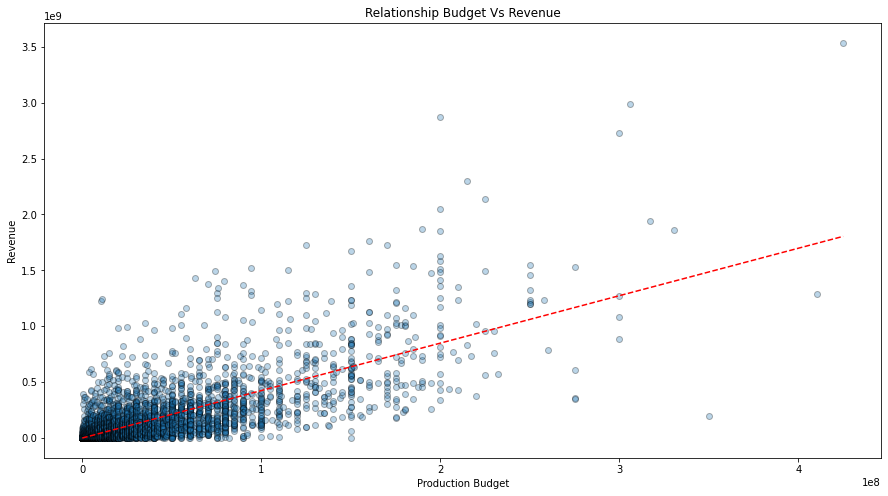

In [16]:
# The relationship between budget and revenue
x = budget_df1['production_budget']
y = budget_df1['revenue']

# Calculate equation for trend line(line of best fit)
z = np.polyfit(budget_df1['production_budget'],budget_df1['revenue'],1)
p = np.poly1d(z)

#plot the graph
fig, ax = plt.subplots(figsize = (15,8))

ax.scatter(x, y, alpha=0.3, edgecolor='black')

ax.plot(x,p(x),color ="red", linestyle="--")


ax.set_title('Relationship Budget Vs Revenue')

ax.set_xlabel('Production Budget')

ax.set_ylabel('Revenue');

Based off our results, its evident that the revenue and production budget are positively correlated.
 Therefore an increase in one will lead to an increase in the other.

#### Find the top 20 Grossing movies?

Here we'll find which  20 movies had the highest revenue earnings.

In [17]:
# Load The data
budget_df2 = budget_df.copy()
budget_df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750
2,3,7-Jun-19,Dark Phoenix,350000000,42762350,149762350,192524700
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
...,...,...,...,...,...,...,...
5777,78,31-Dec-18,Red 11,7000,0,0,0
5778,79,2-Apr-99,Following,6000,48482,240495,288977
5779,80,13-Jul-05,Return to the Land of Wonders,5000,1338,1338,2676
5780,81,29-Sep-15,A Plague So Pleasant,1400,0,0,0


In [19]:
# sort the data frame in descending order by the revenue and filter out the first 20 entries
sort_df = budget_df2.sort_values(by='revenue', ascending=False).head(20)
sort_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,3536852904
5,6,18-Dec-15,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445
42,43,19-Dec-97,Titanic,200000000,659363944,2208208395,2867572339
6,7,27-Apr-18,Avengers: Infinity War,300000000,678815482,2048134200,2726949682
33,34,12-Jun-15,Jurassic World,215000000,652270625,1648854864,2301125489
26,27,4-May-12,The Avengers,225000000,623279547,1517935897,2141215444
41,42,16-Feb-18,Black Panther,200000000,700059566,1348258224,2048317790
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129
66,67,3-Apr-15,Furious 7,190000000,353007020,1518722794,1871729814
3,4,1-May-15,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831


In the code cell above i have sorted the budget 2 dataframe be the revenue in descending order and filtered out the first 20 entries

In order to answer the question above, i will plot a graph showing the distribution between the revenue and the top movie titles.

In the cell below plot the graph:

c:\Users\ASUS ZENBOOK\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


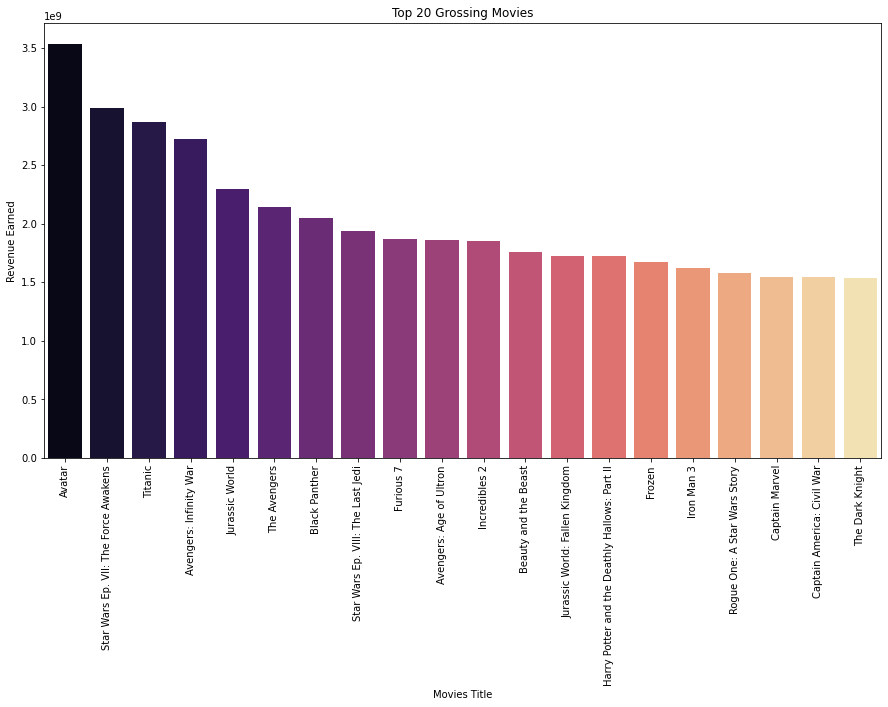

In [24]:
# plot the graph
x = sort_df['movie']
y = sort_df['revenue']

bax,ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(x, y, data=sort_df, palette='magma', orient='v')

ax.set_title('Top 20 Grossing Movies')

ax.set_xlabel('Movies Title')

ax.set_ylabel('Revenue Earned')

plt.xticks(rotation = 90, fontsize=10)

plt.yticks(fontsize=10);

From the above results, we can tell that 'Avatar' is the top most grossing movie having the highest revenue earned followed by 'Star Wars Ep. VII: The Force Awakens' and 'Titanic'

#### what is the return on investment?

It is important to understand if you are making any profits on the production budget. To do this we need to calculate the 'ROI' which which will be calculated as the ratio of revenue to the budget incurred. After that will find the movies with the highest ROI and also find out which movie genres had the highest ROI.